# How to Choose the Number of Clusters

Using the same code as in the previous exercise, find the WCSS for clustering solutions with 1 to 10 clusters (you can try with more if you wish).

Find the most suitable solutions, run them and compare the results.

## Import the relevant libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import math
from matplotlib.colors import ListedColormap
from matplotlib.cm import hsv
sns.set()

def generate_colormap(number_of_distinct_colors: int = 80):
    if number_of_distinct_colors == 0:
        number_of_distinct_colors = 80

    number_of_shades = 7
    number_of_distinct_colors_with_multiply_of_shades = int(math.ceil(number_of_distinct_colors / number_of_shades) * number_of_shades)

    # Create an array with uniformly drawn floats taken from <0, 1) partition
    linearly_distributed_nums = np.arange(number_of_distinct_colors_with_multiply_of_shades) / number_of_distinct_colors_with_multiply_of_shades

    # We are going to reorganise monotonically growing numbers in such way that there will be single array with saw-like pattern
    #     but each saw tooth is slightly higher than the one before
    # First divide linearly_distributed_nums into number_of_shades sub-arrays containing linearly distributed numbers
    arr_by_shade_rows = linearly_distributed_nums.reshape(number_of_shades, number_of_distinct_colors_with_multiply_of_shades // number_of_shades)

    # Transpose the above matrix (columns become rows) - as a result each row contains saw tooth with values slightly higher than row above
    arr_by_shade_columns = arr_by_shade_rows.T

    # Keep number of saw teeth for later
    number_of_partitions = arr_by_shade_columns.shape[0]

    # Flatten the above matrix - join each row into single array
    nums_distributed_like_rising_saw = arr_by_shade_columns.reshape(-1)

    # HSV colour map is cyclic (https://matplotlib.org/tutorials/colors/colormaps.html#cyclic), we'll use this property
    initial_cm = hsv(nums_distributed_like_rising_saw)

    lower_partitions_half = number_of_partitions // 2
    upper_partitions_half = number_of_partitions - lower_partitions_half

    # Modify lower half in such way that colours towards beginning of partition are darker
    # First colours are affected more, colours closer to the middle are affected less
    lower_half = lower_partitions_half * number_of_shades
    for i in range(3):
        initial_cm[0:lower_half, i] *= np.arange(0.2, 1, 0.8/lower_half)

    # Modify second half in such way that colours towards end of partition are less intense and brighter
    # Colours closer to the middle are affected less, colours closer to the end are affected more
    for i in range(3):
        for j in range(upper_partitions_half):
            modifier = np.ones(number_of_shades) - initial_cm[lower_half + j * number_of_shades: lower_half + (j + 1) * number_of_shades, i]
            modifier = j * modifier / upper_partitions_half
            initial_cm[lower_half + j * number_of_shades: lower_half + (j + 1) * number_of_shades, i] += modifier

    return ListedColormap(initial_cm)

## Load the data

Load data from the csv file: <i> 'Countries_exercise.csv'</i>.

In [3]:
data = pd.read_csv('Countries-exercise.csv')
data

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


Remove the duplicate index column from the dataset. 

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns.

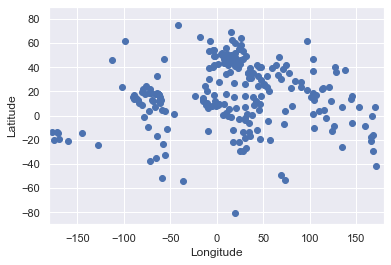

In [4]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Select the features

Make sure to select the appropriate features since we are no longer using the categorical variable for our clustering but rather <i>'Longitude'</i> and <i>'Laditude'</i>.

In [5]:
x = data.iloc[:, 1:3]
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


## Clustering

Use 4 clusters initially.

In [6]:
kmeans = KMeans(4)

### Clustering results

In [7]:
kmeans.fit(x)

KMeans(n_clusters=4)

In [9]:
identified_clusters = kmeans.fit_predict(x)
data['Cluster'] = identified_clusters
data

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,2
1,Afghanistan,66.004734,33.835231,3
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,2
4,Albania,20.049834,41.142450,0
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,2
237,Yemen,47.586762,15.909280,3
238,South Africa,25.083901,-29.000341,3
239,Zambia,27.774759,-13.458242,3


Plot the data once again but separate the data by the clusters we defined.  

## Plot the data

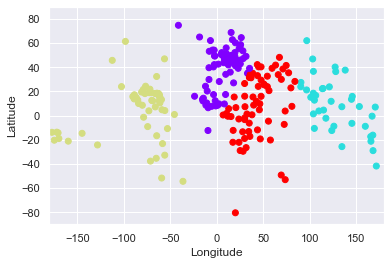

In [10]:
plt.scatter(data['Longitude'], data['Latitude'], c=data['Cluster'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Selecting the number of clusters

### WCSS

Use the ingerated <i>sklearn</i> method <i> 'inertia_' </i>.

In [11]:
kmeans.inertia_

256573.086759343

Write a loop that calculates and saves the WCSS for any number of clusters from 1 up to 10 (or more if you wish).

In [44]:
wcss = []

for i in range(1, 21):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [45]:
wcss

[1413859.6798344273,
 657012.0797586325,
 325235.52237055905,
 256573.086759343,
 192212.4818949704,
 151734.4555070838,
 126758.35414179869,
 102913.61962302419,
 84945.19461239541,
 76687.82426207987,
 70697.45131131011,
 63986.300299144576,
 60587.728164165106,
 53746.27420489105,
 50191.80954317824,
 46900.32281555258,
 45485.26259419126,
 42493.0187029728,
 39291.91965359042,
 36116.8224250458]

### The Elbow Method

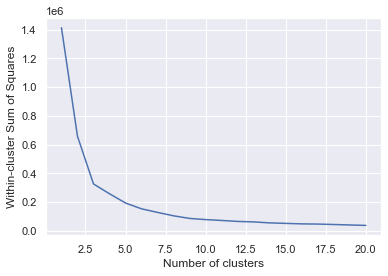

In [46]:
plt.plot(range(1, 21), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

Based on the Elbow Curve, plot several graphs with the appropriate amounts of clusters you believe would best fit the data.

Compare the scatter plots to determine which one to use in our further analysis. 

<i>Hint: we already created the scatter plot for 4 clusters, so we only have to slightly alter our code.</i>

In [47]:
kmeans_new = KMeans(10)
kmeans_new.fit(x)

KMeans(n_clusters=10)

In [48]:
identified_clusters_after_elbow = kmeans_new.fit_predict(x)
data['Optimal Cluster'] = identified_clusters_after_elbow
data

,name,Longitude,Latitude,Cluster,Optimal Cluster
0,Aruba,-69.982677,12.520880,2,0
1,Afghanistan,66.004734,33.835231,3,1
2,Angola,17.537368,-12.293361,3,7
3,Anguilla,-63.064989,18.223959,2,0
4,Albania,20.049834,41.142450,0,4
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,2,5
237,Yemen,47.586762,15.909280,3,1
238,South Africa,25.083901,-29.000341,3,7
239,Zambia,27.774759,-13.458242,3,7


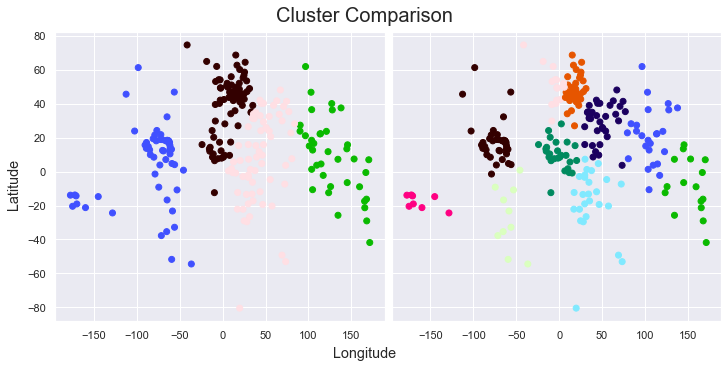

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey='all', figsize=(10, 5), constrained_layout=True)
fig.suptitle('Cluster Comparison', fontsize=20)
fig.supxlabel('Longitude')
fig.supylabel('Latitude')
ax1.scatter(data['Longitude'], data['Latitude'], c=data['Cluster'], cmap=generate_colormap(16*7))
ax2.scatter(data['Longitude'], data['Latitude'], c=data['Optimal Cluster'], cmap=generate_colormap(16*7))
plt.show()